In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
path = "../dataset/all_cases_BCHW.npz"
npz_dict = np.load(path)
cfd_data = npz_dict["data"]
print(npz_dict["data"].shape)

(54, 11, 96, 96)


Flattened shape: (54, 101376)


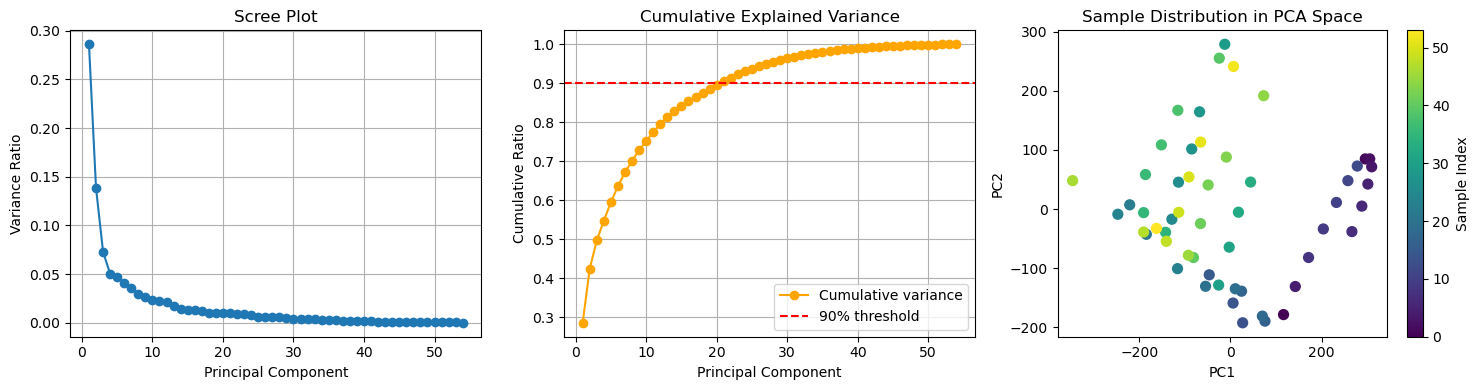

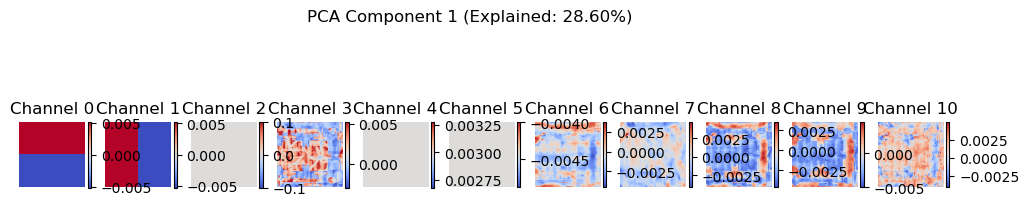

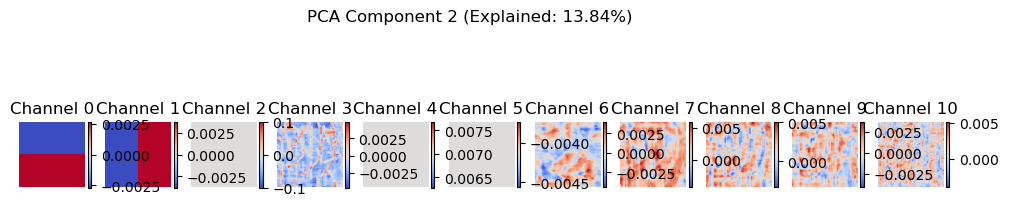

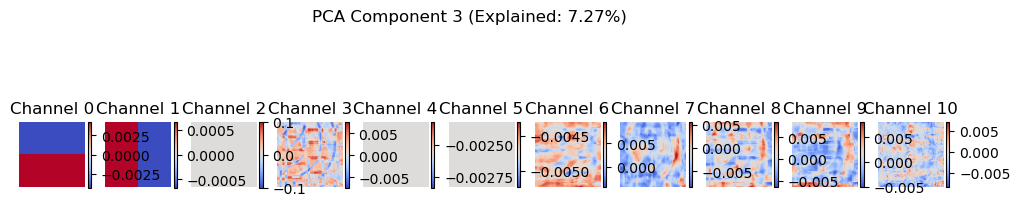

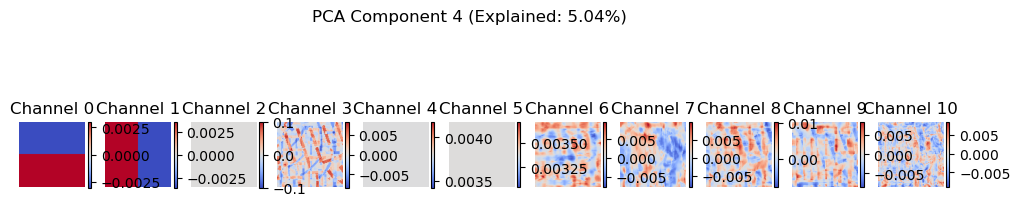

前 21 個主成分即可解釋 90% 的變異。
前 5 個主成分解釋率： [0.28603601 0.13844229 0.07272847 0.05040317 0.04730921 0.04118379
 0.03574507 0.02950437 0.02698953 0.02354997]


In [11]:


# ==============================================
# 1. 載入或建立 CFD 資料
# ==============================================
X = cfd_data
B, C, H, W = X.shape
# X = np.transpose(cfd_data, (1,0,2,3))
# ==============================================
# 2. 展平樣本為向量
# ==============================================
X_flat = X.reshape(B, -1)  # (B, C*H*W)
print("Flattened shape:", X_flat.shape)

# ==============================================
# 3. 標準化（跨樣本的每個維度）
# ==============================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

# ==============================================
# 4. PCA 分解
# ==============================================
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

# ==============================================
# 5. 可視化分析
# ==============================================

plt.figure(figsize=(15, 4))

# (a) Scree plot：每個主成分的變異佔比
plt.subplot(1, 3, 1)
plt.plot(np.arange(1, len(explained) + 1), explained, "o-", label="Explained variance")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)

# (b) 累積變異佔比
plt.subplot(1, 3, 2)
plt.plot(np.arange(1, len(cumulative) + 1), cumulative, "o-", color="orange", label="Cumulative variance")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Ratio")
plt.title("Cumulative Explained Variance")
plt.axhline(0.9, color='r', linestyle='--', label='90% threshold')
plt.legend()
plt.grid(True)

# (c) 样本分佈 (PCA 投影)
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(B), cmap="viridis", s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Sample Distribution in PCA Space")
plt.colorbar(label="Sample Index")
plt.tight_layout()
plt.show()

# ==============================================
# 6. 主成分空間模式視覺化
# ==============================================
n_show = min(4, C)  # 顯示前幾個成分（可調整）
for i in range(n_show):
    component = pca.components_[i].reshape(C, H, W)

    fig, axes = plt.subplots(1, C, figsize=(12, 3))
    fig.suptitle(f"PCA Component {i+1} (Explained: {explained[i]*100:.2f}%)")

    for c in range(C):
        im = axes[c].imshow(component[c], cmap="coolwarm")
        axes[c].set_title(f"Channel {c}")
        axes[c].axis("off")
        fig.colorbar(im, ax=axes[c], fraction=0.046, pad=0.04)

    plt.show()

# ==============================================
# 7. 簡單輸出數據代表性
# ==============================================
n90 = np.argmax(cumulative >= 0.9) + 1
print(f"前 {n90} 個主成分即可解釋 90% 的變異。")
print("前 5 個主成分解釋率：", explained[:10])


In [12]:
def pca_top_variables(pca, C, H, W, pc_index=0, top_n=10):
    """
    顯示 PCA 主成分對應的原始變數 top N
    Args:
        pca: 已經 fit 的 PCA 對象
        C, H, W: 原始 CFD 資料的 channel、高度、寬度
        pc_index: 要查看的主成分索引（0-based）
        top_n: 顯示 top N 重要變數
    """
    weights = pca.components_[pc_index]  # shape = (C*H*W,)
    top_idx = np.argsort(np.abs(weights))[::-1][:top_n]

    print(f"--- PCA Component {pc_index+1} Top {top_n} Variables ---")
    for rank, idx in enumerate(top_idx, 1):
        c = idx // (H*W)
        h = (idx % (H*W)) // W
        w = idx % W
        print(f"{rank:2d}: Channel {c}, H {h}, W {w}, weight={weights[idx]:.4f}")


In [13]:
# 顯示 PC1 的 top 10 重要變數
pca_top_variables(pca, C, H, W, pc_index=0, top_n=10)

# 顯示 PC2 的 top 10 重要變數
pca_top_variables(pca, C, H, W, pc_index=1, top_n=10)


--- PCA Component 1 Top 10 Variables ---
 1: Channel 3, H 43, W 55, weight=0.0053
 2: Channel 3, H 70, W 36, weight=0.0053
 3: Channel 3, H 69, W 36, weight=0.0053
 4: Channel 1, H 26, W 47, weight=0.0052
 5: Channel 1, H 80, W 47, weight=0.0052
 6: Channel 1, H 41, W 47, weight=0.0052
 7: Channel 1, H 62, W 47, weight=0.0052
 8: Channel 1, H 20, W 47, weight=0.0052
 9: Channel 1, H 68, W 47, weight=0.0052
10: Channel 1, H 50, W 47, weight=0.0052
--- PCA Component 2 Top 10 Variables ---
 1: Channel 4, H 95, W 95, weight=0.0070
 2: Channel 4, H 95, W 94, weight=0.0070
 3: Channel 4, H 95, W 93, weight=0.0070
 4: Channel 4, H 95, W 92, weight=0.0070
 5: Channel 4, H 95, W 91, weight=0.0070
 6: Channel 4, H 95, W 90, weight=0.0070
 7: Channel 4, H 95, W 89, weight=0.0070
 8: Channel 4, H 95, W 88, weight=0.0070
 9: Channel 4, H 95, W 87, weight=0.0070
10: Channel 4, H 95, W 86, weight=0.0070


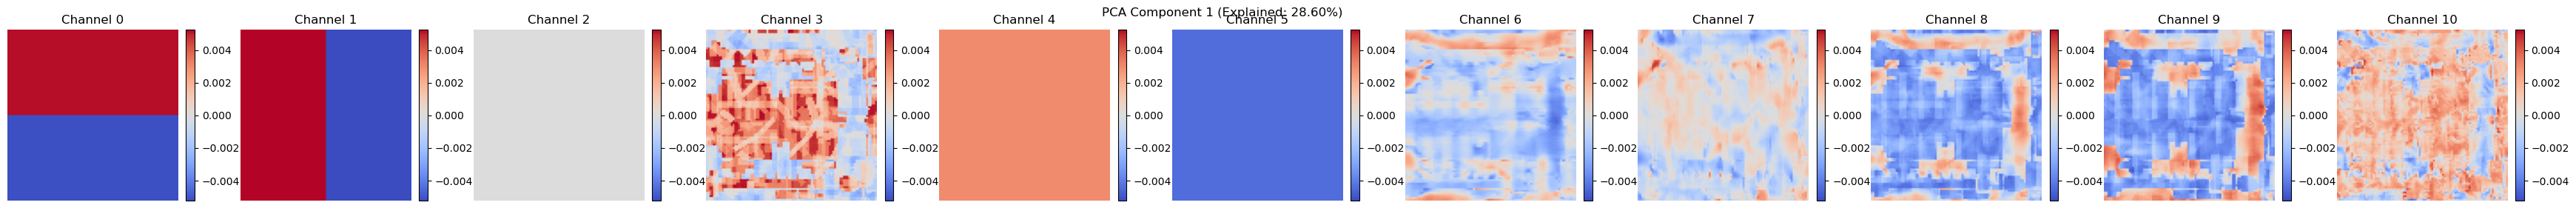

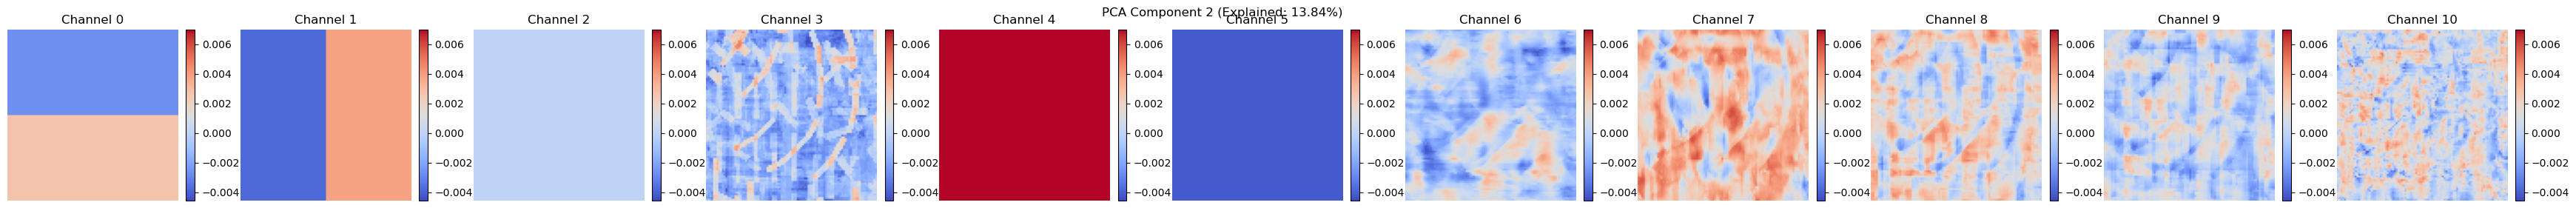

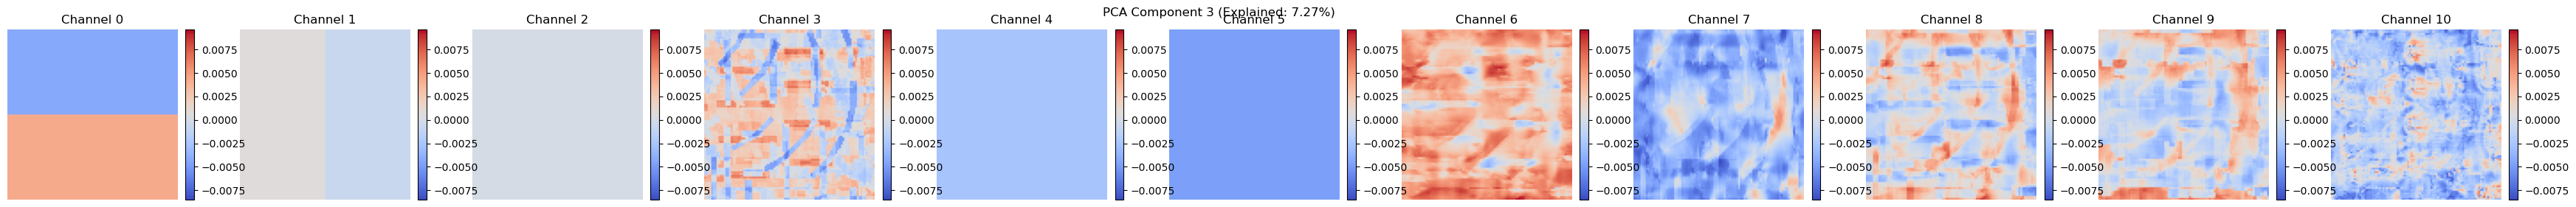

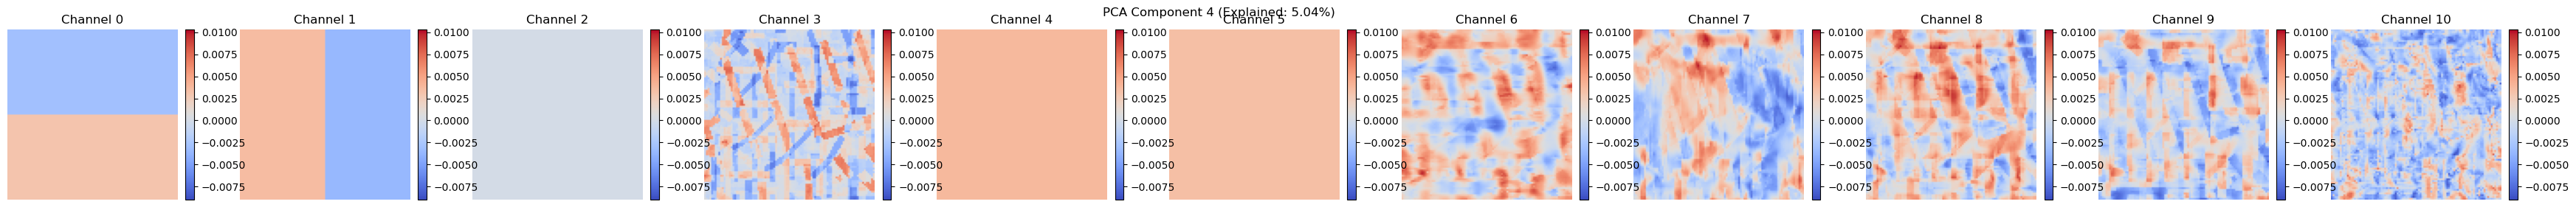

In [25]:
def plot_pca_heatmaps(pca, C, H, W, n_show=4, cmap="coolwarm"):
    """
    將前 n_show 個主成分在 CFD 空間畫出 heat map，所有通道使用統一 color scale
    Args:
        pca: 已經 fit 的 PCA 對象
        C,H,W: 原始 CFD 空間維度
        n_show: 顯示前幾個主成分
        cmap: 顏色 map
    """
    n_show = min(n_show, pca.components_.shape[0])

    for i in range(n_show):
        component = pca.components_[i].reshape(C, H, W)

        # 計算統一 color scale
        vmin = component.min()
        vmax = component.max()

        fig, axes = plt.subplots(1, C, figsize=(4*C, 3))
        if C == 1:
            axes = [axes]
        fig.suptitle(f"PCA Component {i+1} (Explained: {pca.explained_variance_ratio_[i]*100:.2f}%)")

        for c in range(C):
            im = axes[c].imshow(component[c], cmap=cmap, vmin=vmin, vmax=vmax)
            axes[c].set_title(f"Channel {c}")
            axes[c].axis("off")
            fig.colorbar(im, ax=axes[c], fraction=0.046, pad=0.04)

        plt.show()

# 假設你的 cfd_data shape = (B, C, H, W)
B, C, H, W = cfd_data.shape

# 畫前 4 個主成分的 heat map
plot_pca_heatmaps(pca, C, H, W, n_show=4)


(54, 11, 96, 96)
(54, 96, 96)
0.003856101110663063
(54,)


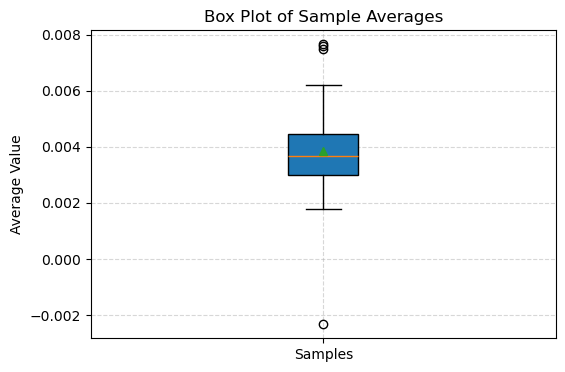

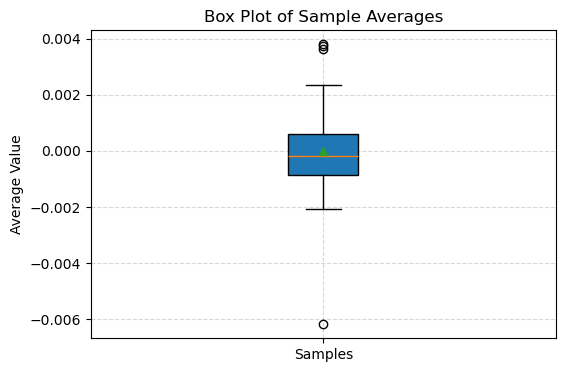

In [35]:
print(cfd_data.shape)


u_diff = cfd_data[:,8]-np.sqrt(cfd_data[:,6]**2+cfd_data[:,7]**2)
print(u_diff.shape)
mean = u_diff.mean()
print(mean)
arr_avg = u_diff.mean(axis=(1, 2))
print(arr_avg.shape)

plt.figure(figsize=(6, 4))
plt.boxplot(arr_avg, vert=True, patch_artist=True, showmeans=True)
plt.title("Box Plot of Sample Averages")
plt.ylabel("Average Value")
plt.xticks([1], ["Samples"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(6, 4))
plt.boxplot(arr_avg-mean, vert=True, patch_artist=True, showmeans=True)
plt.title("Box Plot of Sample Averages")
plt.ylabel("Average Value")
plt.xticks([1], ["Samples"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

